In [2]:
import pandas as pd
df = pd.read_csv('purchases.csv')
print(df)

  Unnamed: 0 country  ad_views  items_purchased
0     George      US        16                2
1       John     CAN        42                1
2     Thomas     CAN        32                0
3      James      US        13                8
4     Andrew     CAN        63                0
5     Martin      US        19                5
6    William      US        65                7
7    Zachary      US        23                3
8    Millard     CAN        16                0
9   Franklin      US        77                5


In [3]:
df2 = pd.read_json('purchases.json')
print (df2)

  Unnamed: 0  ad_views country  items_purchased
0     George        16      US                2
1       John        42     CAN                1
2     Thomas        32     CAN                0
3      James        13      US                8
4     Andrew        63     CAN                0
5     Martin        19      US                5
6    William        65      US                7
7    Zachary        23      US                3
8    Millard        16     CAN                0
9   Franklin        77      US                5


In [6]:
import xml.etree.ElementTree as ET
tree = ET.parse('purchases.xml')
root = tree.getroot()
def xml_to_list(root):
    result = []
    for row in root:
        row_list = []
        for column in row:
            row_list.append(column.text)
        result.append(row_list)
    return result
df3 = pd.DataFrame(xml_to_list(root))
print(df3)

          0    1   2  3
0    George   US  16  2
1      John  CAN  42  1
2    Thomas  CAN  32  0
3     James   US  13  8
4    Andrew  CAN  63  0
5    Martin   US  19  5
6   William   US  65  7
7   Zachary   US  23  3
8   Millard  CAN  16  0
9  Franklin   US  77  5


In [7]:
with open('poem.txt') as poem_file:
    text = poem_file.readlines()
    print('This file is {} lines long'.format(len(text)))
    for line in text:
        print(line)

This file is 19 lines long
Beautiful is better than ugly.

Explicit is better than implicit.

Simple is better than complex.

Complex is better than complicated.

Flat is better than nested.

Sparse is better than dense.

Readability counts.

Special cases aren't special enough to break the rules.

Although practicality beats purity.

Errors should never pass silently.

Unless explicitly silenced.

In the face of ambiguity, refuse the temptation to guess.

There should be one-- and preferably only one --obvious way to do it.

Although that way may not be obvious at first unless you're Dutch.

Now is better than never.

Although never is often better than *right* now.

If the implementation is hard to explain, it's a bad idea.

If the implementation is easy to explain, it may be a good idea.

Namespaces are one honking great idea -- let's do more of those!


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
np.random.seed(1221)
df = pd.DataFrame()
df['rand'] = np.random.rand(100)
df['rand_sq'] = df['rand'] ** 2
df['rand_shift'] = df['rand'] + 2
df['counts_sq'] = df.index ** 2
df['counts_sqrt'] = np.sqrt(df.index)

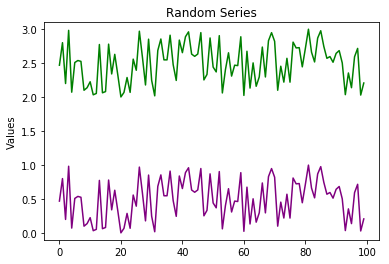

In [12]:
plt.plot(df['rand'], color='purple')
plt.plot(df['rand_shift'], color='green')
plt.ylim([-0.1, 3.1])
plt.ylabel('Values')
plt.title('Random Series')
plt.show()

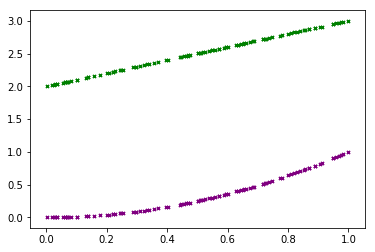

In [13]:
plt.scatter(
    x=df['rand'],
    y=df['rand_sq'],
    color='purple',
    marker='x', s=10
)
plt.scatter(
    x=df['rand'],
    y=df['rand_shift'],
    color='green',
    marker='x', s=10
)
plt.show()

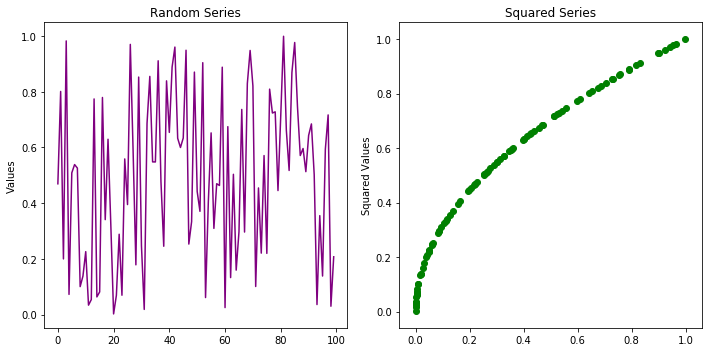

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(df['rand'], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.subplot(1, 2, 2)
plt.scatter(x = df['rand_sq'], y = df['rand'], color='green')
plt.ylabel('Squared Values')
plt.title('Squared Series')
plt.tight_layout()
plt.show()

In [20]:
x = np.random.normal(10, 5, 1000)
y = np.random.normal(10, 5, 10000)
# Note: 'alpha' controls opacity - why does np.arrange not work?
plt.hist(x, color='blue', bins=np.arrange(-10, 40), alpha=.5)
plt.hist(y, color='red', bins=np.arrange(-10, 40), alpha=.5)
plt.title('Manually setting bin placement')
plt.xlable('Random Values')
plt.show()

AttributeError: module 'numpy' has no attribute 'arrange'

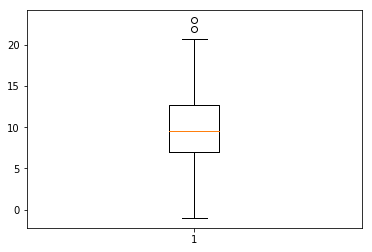

In [21]:
np.random.seed(111)
x = np.random.normal(10, 5, 100)
plt.boxplot(x)
plt.show()

In [9]:
df = pd.DataFrame()
df['age'] = [28, 42, 27, 24, 35, 54, 35, 37]
print (sum(df['age']) / len(df['age']))
np.mean(df['age'])# this has the same purpose as the line above
import statistics
print (statistics.median(df['age']))
np.median(df['age']) # also has the same purpose as the line above
statistics.mode(df['age'])

35.25
35.0


35.0

In [10]:
# generate a list of unique elements along w/ how often they occur
(values, counts) = np.unique(df['age'], return_counts=True)
ind = np.argmax(counts)
values[ind] # most frequent element

35

In [21]:
# variance of an array - 
df['age'].var()
np.var(df.age)
# standard deviation
np.std(df['age'], ddof=1)

# standard error - mean of the standard deviation of the sample divided 
# by the square root of the sample size - se = s / (n ** 0.5)
np.std(df['age'], ddof=1) / np.sqrt(len(df['age']))

3.4003676271838605

In [29]:
# Set up a datafram for variation examples
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))
data.head()

female    100
male      100
Name: gender, dtype: int64


,gender,height,weight
0,male,70.379123,180.276874
1,male,59.291468,163.062750
2,male,74.568809,196.635251
3,male,88.991671,238.013687
4,male,82.293483,187.028750


In [30]:
data.gender.value_counts()

female    100
male      100
Name: gender, dtype: int64

In [25]:
data.describe()

,height,weight
count,200.000000,200.000000
mean,66.842536,178.666138
std,7.425014,21.381924
min,49.368679,130.074477
25%,62.316874,163.751459
50%,66.437570,176.259621
75%,71.099311,193.241225
max,94.092784,234.284505


In [26]:
data.groupby('gender').describe()

height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  64.554233  5.139782  51.822760  61.730494  64.483143   
male    100.0  69.130839  8.592017  49.368679  64.964643  68.933707   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  67.480036  76.341935  100.0  167.563731  14.055326  135.254109   
male    74.751447  94.092784  100.0  189.768546  21.735274  130.074477   

                                                        
               25%         50%         75%         max  
gender                                                  
female  158.020999  166.755833  175.451899  211.514532  
male    176.408348  188.773241  204.645966  234.284505